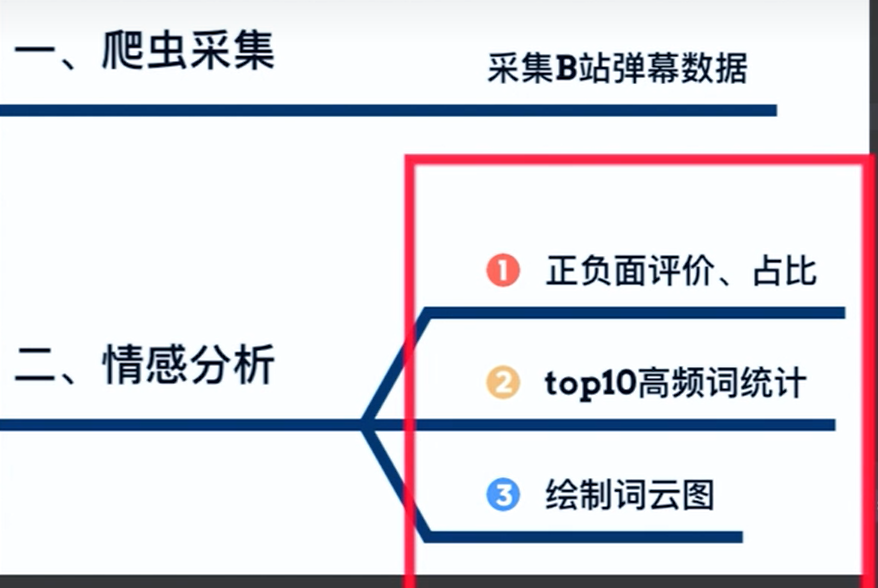

# 一、爬虫获取b站视频弹幕

In [1]:
import re #正则表达式提取文本
import requests
#爬虫发送请求
from bs4 import BeautifulSoup as BS
import time
# 爬虫解析页面
import pandas as pd #存入csv文件
import os


In [2]:
def get_bilibili_danmu(v_url, v_result_file):
    """
    爬取B站弹幕
    :param v_url:视频地址
    :param v_result_file:保存文件名
    :return:
    """
    # 伪装浏览器请求头
    headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0;WOW64) AppleWebKit/537.36 (KHTML, like Gecko)", }
    print('视频地址是:', q)
    r1= requests.get(url=v_url, headers=headers)
    html1=r1.text
#     cid=re.findall('cid=(.*?)&aid=',html1)[0] #获取视频对应的cid号
    cid=418074411
    print('该视频的cid是:',cid)
    danmu_url = 'http://comment.bilibili.com/{}.xml'.format(cid)#弹幕地址
    print('弹幕地址是:',danmu_url)
    r2=requests.get(danmu_url)
    html2 = r2.text.encode('raw_unicode_escape') #编码格式
    soup = BS(html2, 'xml')
    danmu_list=soup.find_all('d') #解析返回的页面数据，找到所有的d标签
    print('爬取到{}条弹幕'.format(len(danmu_list)))
    video_url_list=[] #视频地址
    danmu_url_list=[]#弹幕地址
    time_list=[]#弹幕时间
    text_list =[]#弹幕内容
    for d in danmu_list:
        data_split=d['p'].split(',')
        temp_time = time.localtime(int(data_split[4])) #转换时间格式
        danmu_time = time.strftime("%Y-%m-%d %H:%S", temp_time)
        video_url_list.append(v_url)
        danmu_url_list.append(danmu_url)
        time_list.append(danmu_time)
        text_list.append(d.text)
        print('{}:{}'.format(danmu_time,d.text))
    df=pd.DataFrame() #初始化一个DataFrame对象
    df['视频地址']=video_url_list
    df['弹幕地址']=danmu_url_list
    df['弹幕时间']=time_list
    df['弹幕内容']=text_list
    if os.path.exists(v_result_file):#如果文件存在,不需写入字段标路
          header = None
    else:#如果文件不存在,说明是第一次新建文件,需写入字段标题
        header =['视频地址','弹幕地址','弹幕时间','弹幕内容']
    df.to_csv(v_result_file,encoding='utf_8_sig',mode='a+', index=False, header=header) #a+追加
#数据保存到csv文件

if __name__=='__main__':
    print('爬虫程序开始执行!')
    #保存数据的文件名
    csv_file='谷爱凌弹幕.csv'
    #如果存在csv文件,先删除,避免数据重复
    if os.path.exists(csv_file):
        print('{}已存在,开始删除文件'.format(csv_file))
        os.remove(csv_file)
        print('{}已删除文件'.format(csv_file))
    # "谷爱凌"弹幕数较多的视频Bv号
    bv_list = ['BV1Np4y1B799t','BV1n64y107zT', 'BV17770']
    #开始爬取               
    for bv in set(bv_list):
        get_bilibili_danmu(v_url='https://www.bilibili.com/video/{}'.format(bv),v_result_file='谷爱凌弹幕.csv')
#         get_bilibili_danmu(v_url='https://www.bilibili.com/video/BV1Np4y1B799t',v_result_file='谷爱凌弹幕.csv')
    print('爬虫程序执行完毕!')



爬虫程序开始执行!
谷爱凌弹幕.csv已存在,开始删除文件
谷爱凌弹幕.csv已删除文件
视频地址是: https://www.bilibili.com/video/BV17770
该视频的cid是: 418074411
弹幕地址是: http://comment.bilibili.com/418074411.xml
爬取到749条弹幕
2021-10-03 17:30:BBC:中国鄙视外国人，不要求外国人进入冬奥会会场
2021-10-02 19:16:基建狂魔开启模块化道路
2021-10-02 20:20:想起植物大战僵尸。。。
2021-10-02 22:01:好耶ヾ(Ő∀Ő๑)ﾉ太好惹
2021-10-02 20:34:这可以省很多小钱钱
2021-10-02 20:35:篮球冻手哈哈哈
2021-10-02 19:00:这才是大国风范
2021-10-02 19:26:教教日本人什么叫做环保
2021-10-02 19:33:什么叫负责任的奥运会啊(后仰)
2021-10-02 19:23:不能说没有夏奥好看，只是冬奥的项目普通人接触的少，所以观赏起来有些障碍。
2021-10-10 20:06:好怕有恶意带毒的又来搞破坏
2021-10-02 23:11:可以售纪念票，多搞点小钱钱
2021-10-02 21:49:让隔壁岛国看看什么TM的叫TM的真正的奥运会
2021-10-02 20:34:21天还是有点儿少了。小心复阳啊，要留有后手
2021-10-02 20:11:真正主场
2021-10-02 20:44:让咱们再次教教他们什么才是真正地冬奥会！
2021-10-02 20:48:参与过建设
2021-10-02 19:52:太负责太有章程了
2021-10-02 19:47:咱们坐咱自己屋里对不对，哈哈
2021-10-02 19:13:伟大的祖国啊 您总是让我无比骄傲
2021-10-02 19:36:好家伙，那打篮球岂不是很凉快
2021-10-27 10:14:有理有据
2021-10-17 23:50:提前来符合要求那肯定可以的啊
2021-10-11 12:26:省钱、环保、安全～为祖国点个赞
2021-10-10 19:04:那就是绿色的健康码咯
2021-10-10 19:02:看到这个车就想起植物大战僵尸
2021-10-0

该视频的cid是: 418074411
弹幕地址是: http://comment.bilibili.com/418074411.xml
爬取到749条弹幕
2021-10-03 17:30:BBC:中国鄙视外国人，不要求外国人进入冬奥会会场
2021-10-02 19:16:基建狂魔开启模块化道路
2021-10-02 20:20:想起植物大战僵尸。。。
2021-10-02 22:01:好耶ヾ(Ő∀Ő๑)ﾉ太好惹
2021-10-02 20:34:这可以省很多小钱钱
2021-10-02 20:35:篮球冻手哈哈哈
2021-10-02 19:00:这才是大国风范
2021-10-02 19:26:教教日本人什么叫做环保
2021-10-02 19:33:什么叫负责任的奥运会啊(后仰)
2021-10-02 19:23:不能说没有夏奥好看，只是冬奥的项目普通人接触的少，所以观赏起来有些障碍。
2021-10-10 20:06:好怕有恶意带毒的又来搞破坏
2021-10-02 23:11:可以售纪念票，多搞点小钱钱
2021-10-02 21:49:让隔壁岛国看看什么TM的叫TM的真正的奥运会
2021-10-02 20:34:21天还是有点儿少了。小心复阳啊，要留有后手
2021-10-02 20:11:真正主场
2021-10-02 20:44:让咱们再次教教他们什么才是真正地冬奥会！
2021-10-02 20:48:参与过建设
2021-10-02 19:52:太负责太有章程了
2021-10-02 19:47:咱们坐咱自己屋里对不对，哈哈
2021-10-02 19:13:伟大的祖国啊 您总是让我无比骄傲
2021-10-02 19:36:好家伙，那打篮球岂不是很凉快
2021-10-27 10:14:有理有据
2021-10-17 23:50:提前来符合要求那肯定可以的啊
2021-10-11 12:26:省钱、环保、安全～为祖国点个赞
2021-10-10 19:04:那就是绿色的健康码咯
2021-10-10 19:02:看到这个车就想起植物大战僵尸
2021-10-09 21:17:已经十月了
2021-10-09 21:09:已经十月了
2021-10-08 22:05:我生日诶
2021-10-05 21:48:好诶！
2021-10-04 

视频地址是: https://www.bilibili.com/video/BV1n64y107zT
该视频的cid是: 418074411
弹幕地址是: http://comment.bilibili.com/418074411.xml
爬取到749条弹幕
2021-10-03 17:30:BBC:中国鄙视外国人，不要求外国人进入冬奥会会场
2021-10-02 19:16:基建狂魔开启模块化道路
2021-10-02 20:20:想起植物大战僵尸。。。
2021-10-02 22:01:好耶ヾ(Ő∀Ő๑)ﾉ太好惹
2021-10-02 20:34:这可以省很多小钱钱
2021-10-02 20:35:篮球冻手哈哈哈
2021-10-02 19:00:这才是大国风范
2021-10-02 19:26:教教日本人什么叫做环保
2021-10-02 19:33:什么叫负责任的奥运会啊(后仰)
2021-10-02 19:23:不能说没有夏奥好看，只是冬奥的项目普通人接触的少，所以观赏起来有些障碍。
2021-10-10 20:06:好怕有恶意带毒的又来搞破坏
2021-10-02 23:11:可以售纪念票，多搞点小钱钱
2021-10-02 21:49:让隔壁岛国看看什么TM的叫TM的真正的奥运会
2021-10-02 20:34:21天还是有点儿少了。小心复阳啊，要留有后手
2021-10-02 20:11:真正主场
2021-10-02 20:44:让咱们再次教教他们什么才是真正地冬奥会！
2021-10-02 20:48:参与过建设
2021-10-02 19:52:太负责太有章程了
2021-10-02 19:47:咱们坐咱自己屋里对不对，哈哈
2021-10-02 19:13:伟大的祖国啊 您总是让我无比骄傲
2021-10-02 19:36:好家伙，那打篮球岂不是很凉快
2021-10-27 10:14:有理有据
2021-10-17 23:50:提前来符合要求那肯定可以的啊
2021-10-11 12:26:省钱、环保、安全～为祖国点个赞
2021-10-10 19:04:那就是绿色的健康码咯
2021-10-10 19:02:看到这个车就想起植物大战僵尸
2021-10-09 21:17:已经十月了
2021-10-09 21:09:已经十月了
202

2021-10-02 22:40:好耶
2021-10-02 22:59:真的牛啤
2021-10-02 22:38:专业
2021-10-02 21:14:牛批
2021-10-02 21:59:都接种科兴滴
2021-10-02 21:24:舒服了
2021-10-02 21:51:干得漂亮
2021-10-02 21:52:一刻也不能停
2021-10-02 21:31:可以，的
2021-10-02 21:06:熟悉的中建一局
2021-10-02 21:48:好啊！
2021-10-02 21:19:好耶
2021-10-02 21:27:好耶
2021-10-02 21:25:好耶
2021-10-02 21:58:这个厉害！
2021-10-02 21:05:没有中国绿卡，一律禁入
2021-10-02 21:21:好牛批
2021-10-02 21:09:防止放毒，闭环可以
2021-10-02 21:07:牛
2021-10-02 21:34:。现在外国人入镜太难了，怎么可能提前来
2021-10-02 21:44:支持
2021-10-02 21:06:以后啥大型赛事也别接了，LOL总决赛这么小的赛事都没接
2021-10-02 21:17:哈哈哈哈哈哈哈
2021-10-02 21:53:哈哈哈哈哈
2021-10-02 21:11:一个字，专业
2021-10-02 21:46:啥时候卖！
2021-10-02 21:07:什么什么，我在看评论，怎么一抬头冰场没了
2021-10-02 21:41:好耶！
2021-10-02 21:39:好耶
2021-10-02 21:21:真的我们的中国环保都很好的
2021-10-02 21:07:good
2021-10-02 21:53:好耶
2021-10-02 21:26:中国！牛逼！
2021-10-02 21:39:好
2021-10-02 21:08:好耶
2021-10-02 21:38:好耶
2021-10-02 21:29:榨干性价比
2021-10-02 21:06:支持
2021-10-02 21:49:支持
2021-10-02 21:04:版本更新
2021-10-02 21:01:他提前来呢
2021-10-02 21:35:好耶！！！
2021-10-02 21:42:

# 二、弹幕情感分析

In [7]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple snownlp

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=dd117e267e0e4edac9fb01192e0b919d773fba4dec03742632ff55315ff32ccd
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\77\fe\90\12e3895d37c092ea26f6bfc071345dd0e5111ef347a98ea7a4
Successfully built snownlp
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
#数据分析库
from snownlp import SnowNLP #中文情感分析库
from wordcloud import WordCloud #绘制词云图
from pprint import pprint #美观打印
import jieba.analyse #jieba分词
from PIL import Image#读取图片
import numpy as np #将图片的像素点转换成矩阵数据


In [4]:
#情感分析
def sentiment_analyse(v_cmt_list):
    """ 情感分析打分
    :param v_cmt_list:需要处理的评论列
    :return:
    """    
    score_list=[]#情感评分值
    tag_list =[]#打标分类结果
    pos_count= 0#计数器-积极
    neg_count= 0#计数器-消极

    for comment in v_cmt_list:
        tag=''
        sentiments_score = SnowNLP(comment).sentiments
        if sentiments_score<0.3:
            tag='消极'
            neg_count += 1
        else:
            tag='积极'
            pos_count += 1
        score_list.append(sentiments_score)
        tag_list.append(tag)#判定结果
        #得分值
    print('积极评价占比:',round(pos_count/(pos_count+neg_count),4))
    print('消极评价占比:',round(neg_count/(pos_count+neg_count),4))
    df['情感得分']=score_list
    df['分析结果']=tag_list
    #把情感分析结果保存到excel文件
    df.to_excel('谷爱凌_情感评分结果.xlsx',index=None)
    print('情感分析结果已生成:谷爱凌_情感评分结果.xlsx')



In [16]:
# 生成词云图
def make_wordcloud(v_str, v_stopwords,v_outfile):
    print('开始生成词云图:{}'.format(v_outfile))
    try:
        stopwords=v_stopwords#停用词
        backgroud_Image=np.array(Image.open('谷爱凌.png'))#读取背景图片
        wc = WordCloud(
            background_color="white",#背景颜色
            width=1500,#图宽
            height=1200,#图高           
            max_words=1000, # 最多字数
        #     font_path='/System/Library/Fonts/SimHei.ttf',#字本文件路径,根据实际情况(Mac)替换
            font_path="C:/Windows/Fonts\simhei.ttf",#字体文件路径圣,根据实际情况(Windows)替换
            stopwords=stopwords, #停用词
            mask=backgroud_Image,
            #背景图片
        )
        jieba_text=" ".join(jieba.lcut(v_str))#jieba分词
        wc.generate_from_text(jieba_text)#生成词云图
#         print(a)
        wc.to_file(v_outfile)#保存图片文件    
        print('词云文件保存成功:{}'.format(v_outfile))
    except Exception as e:
              print('make_wordcloud except:{}'.format(str(e)))

In [18]:
if __name__=="__main__":
    df=pd.read_csv('谷爱凌弹幕.csv')#读取excel
    v_cmt_list=df['弹幕内容'].values.tolist()#评论内容列表
    print('length of v_cmt_list is:{}'.format(len(v_cmt_list)))
    v_cmt_list=[str(i)for i in v_cmt_list]#数据清洗-list所有元素转换成字符串
    v_cmt_str =''.join(str(i)for i in v_cmt_list)#评论内容转换为字符8
    #1、情感分析打分    
    sentiment_analyse(v_cmt_list=v_cmt_list)
    #2、用jieba统计弹幕中的top10高频词
    keywords_top10 = jieba.analyse.extract_tags(v_cmt_str, withWeight=True, topK=10)
    print('top10关键词及权重:')
    pprint(keywords_top10)
#     3、画词云图
    make_wordcloud(v_str=v_cmt_str,
        v_stopwords=['的','啊','她','是','你','你','都','都','也','不','在','说','就是','这','有'], # 停用Sự
        v_outfile='谷爱凌弹幕.jpg' #词云图文件名
    )
    

length of v_cmt_list is:2247
积极评价占比: 0.8732
消极评价占比: 0.1268
情感分析结果已生成:谷爱凌_情感评分结果.xlsx
top10关键词及权重:
[('耶好', 0.27501981315082674),
 ('好耶好', 0.2492367056679367),
 ('漂亮', 0.18184992784667145),
 ('支持', 0.12409705959347231),
 ('哈哈哈', 0.11338750693475197),
 ('好好', 0.1028336522532854),
 ('隔离', 0.07051470801774265),
 ('提前', 0.06834647453540618),
 ('干得', 0.061735957389863406),
 ('nice', 0.06016058412674335)]
开始生成词云图:谷爱凌弹幕.jpg
词云文件保存成功:谷爱凌弹幕.jpg
